Week 1 

In Week 1, learned the fundamentals of sourcing datasets from reliable platforms such as Kaggle, UCI Machine Learning Repository, and other open data portals. The focus was on understanding data formats (CSV, Excel, JSON, etc.) and learning how to load them efficiently into Python using libraries like pandas and NumPy. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [2]:
df = pd.read_csv('/workspaces/GNCIPL-INTERNSHIP---MINI-PROJECTS/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

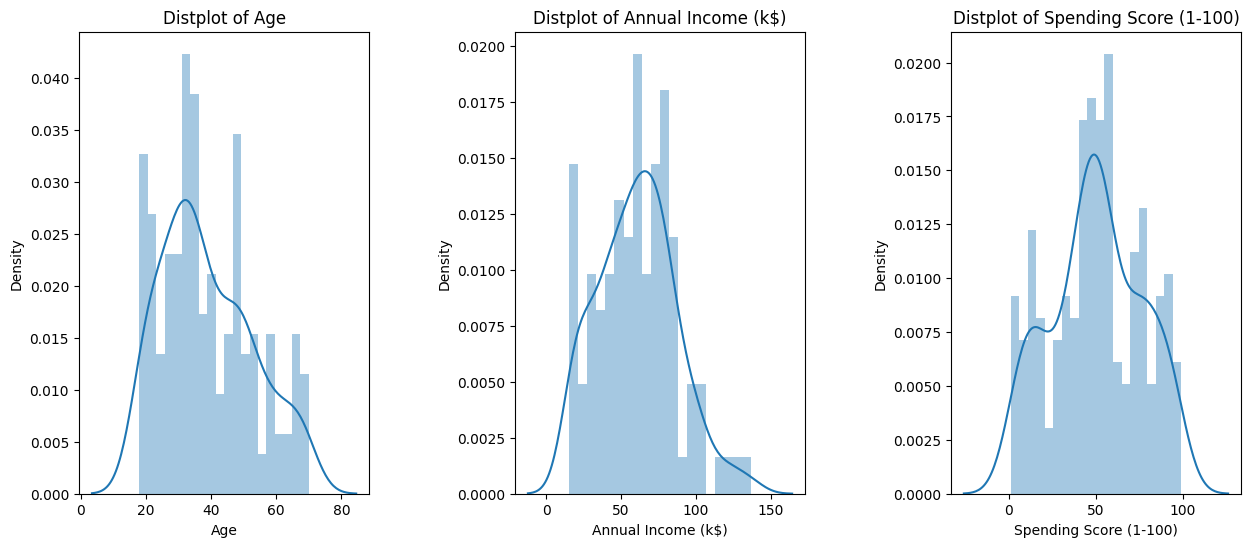

In [7]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

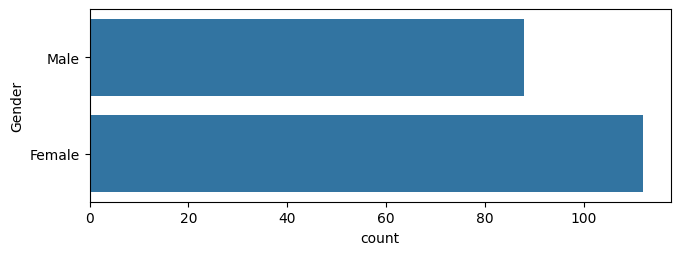

In [8]:
plt.figure(1 , figsize = (7.5 , 2.5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

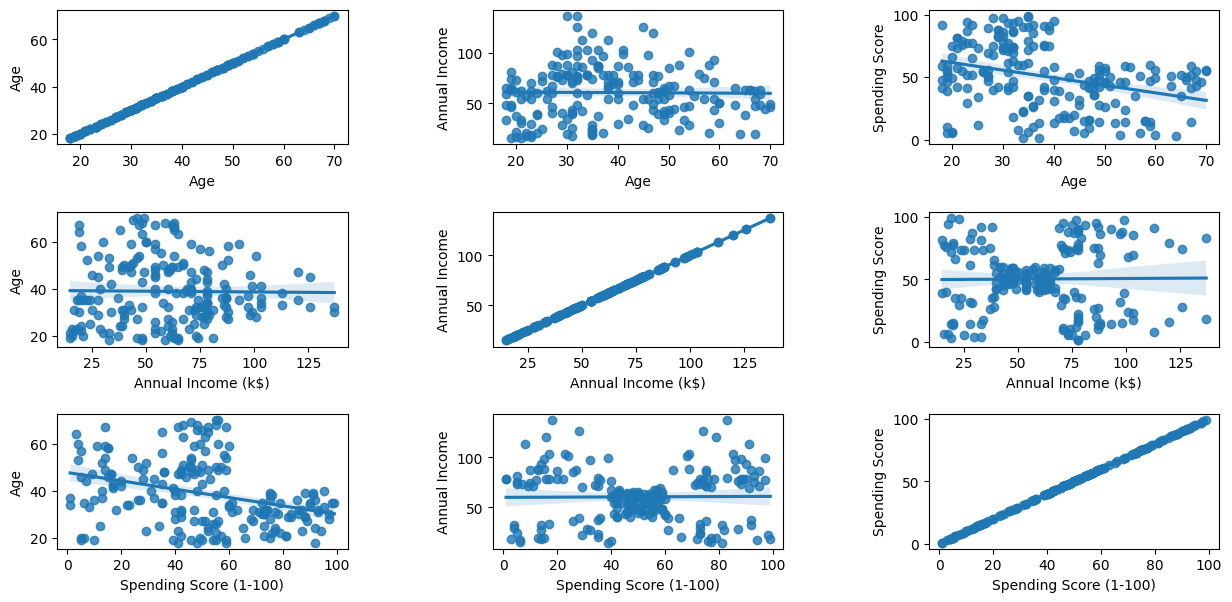

In [9]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

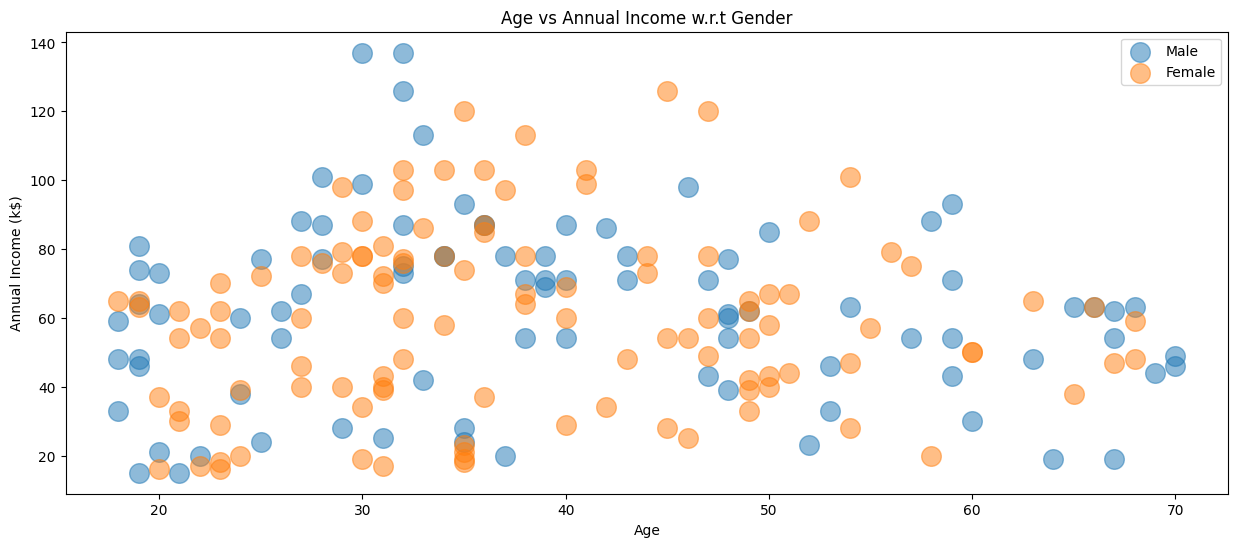

In [10]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

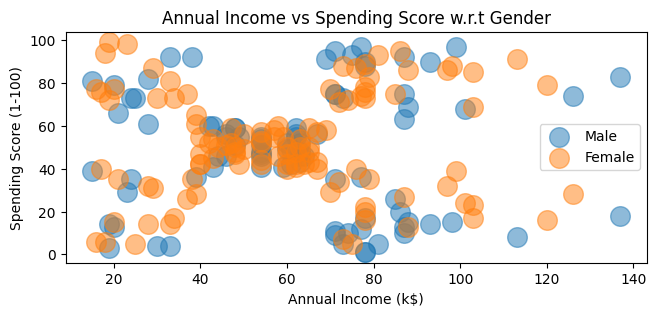

In [11]:
plt.figure(1 , figsize = (7.5 , 3))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

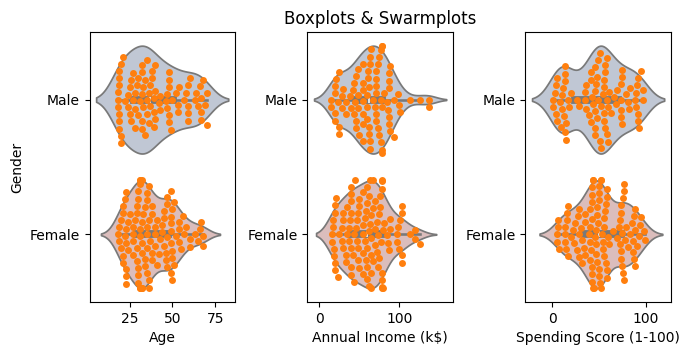

In [12]:
plt.figure(1 , figsize = (7.5 , 3.5))
n = 0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

Week 2

In Week 2, the focus was on performing Exploratory Data Analysis to understand the structure, patterns, and relationships within datasets. I learned how to summarize key statistics, detect missing values, identify outliers, and visualize data using libraries like Matplotlib and Seaborn. This step was crucial for preparing data for further analysis and building a solid foundation for modeling.

<Figure size 1000x600 with 0 Axes>

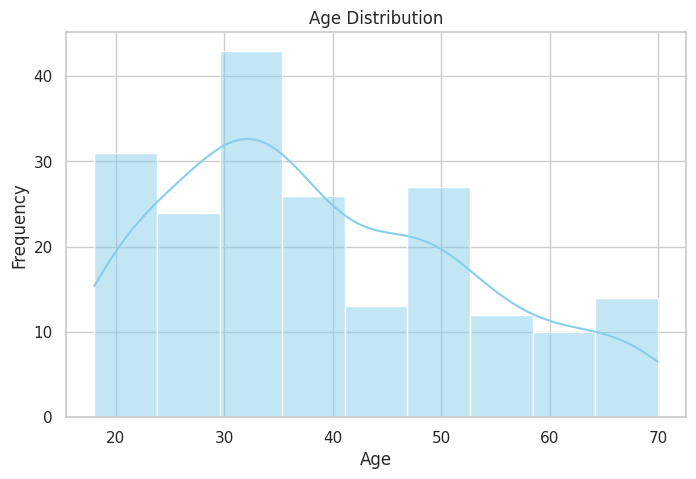

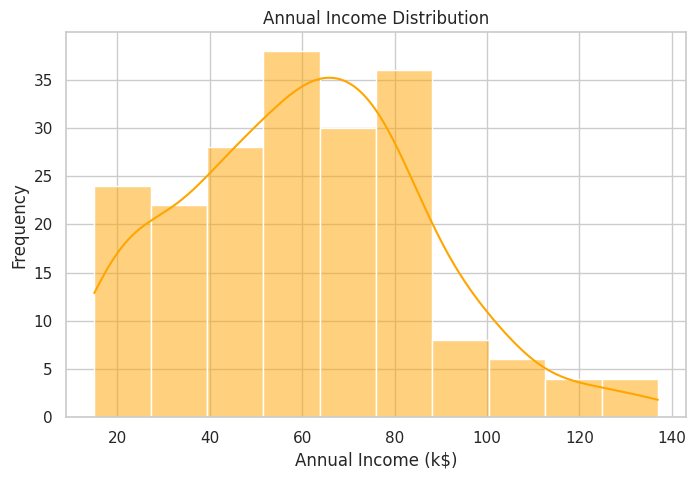

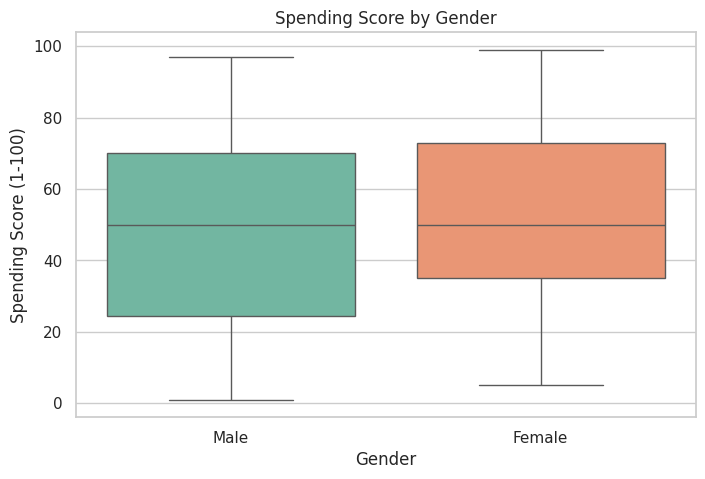

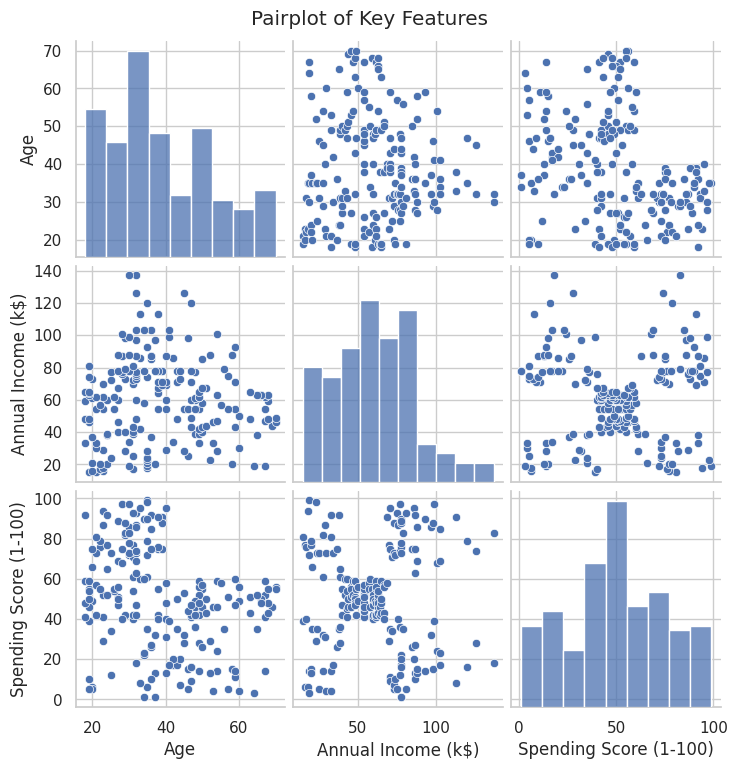

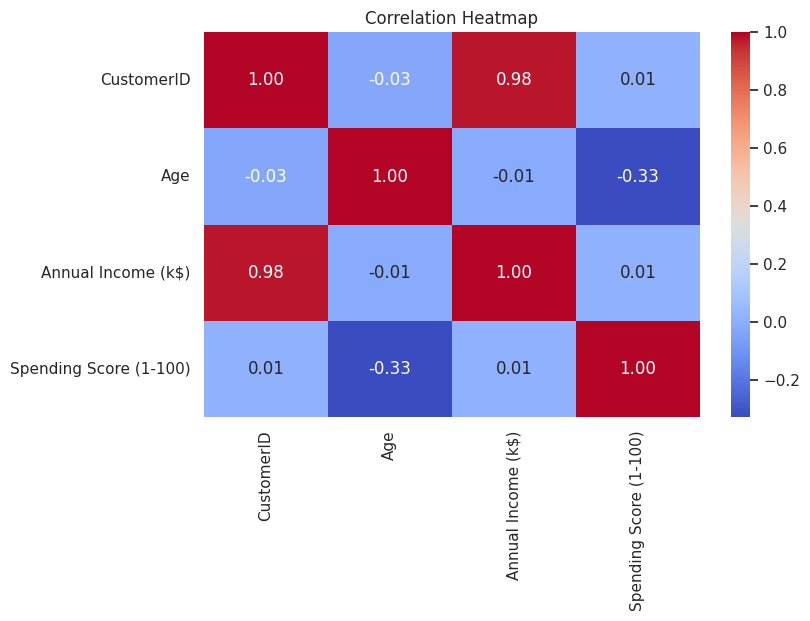

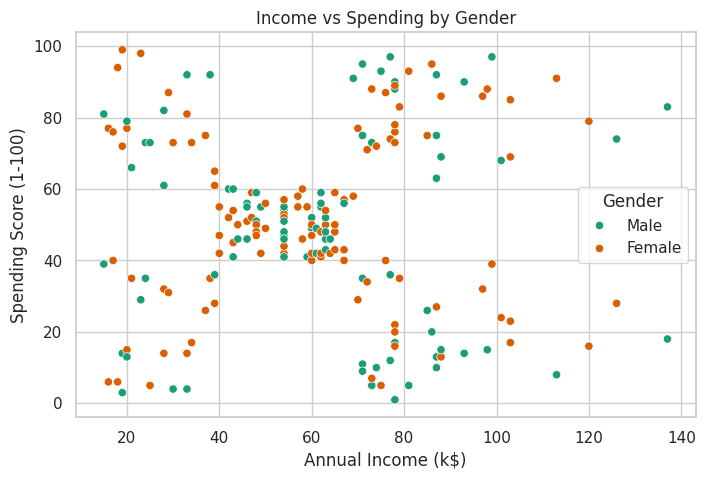

In [13]:
# 🔍 Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# 1. Histogram of Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Histogram of Annual Income
plt.figure(figsize=(8, 5))
sns.histplot(df['Annual Income (k$)'], kde=True, color='orange')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

# 3. Boxplot of Spending Score by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set2')
plt.title('Spending Score by Gender')
plt.show()

# 4. Pairplot of numerical features
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 6. Scatterplot of Income vs Spending by Gender
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, palette='Dark2')
plt.title("Income vs Spending by Gender")
plt.show()


In [14]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

In [15]:
import sklearn
sklearn.__version__

'1.7.0'

Week 3 & Week 4 – Model Building, Tuning, and Evaluation

During Weeks 3 and 4, the focus shifted to machine learning model development and optimization. I implemented clustering algorithms such as K-Means, Bisecting K-Means, and Agglomerative Clustering, followed by fine-tuning parameters to achieve better performance.

Key evaluation metrics like the Silhouette Score were used to measure cluster quality, helping in the selection of the most effective model configuration. These weeks enhanced my understanding of balancing accuracy, efficiency, and interpretability in unsupervised learning.

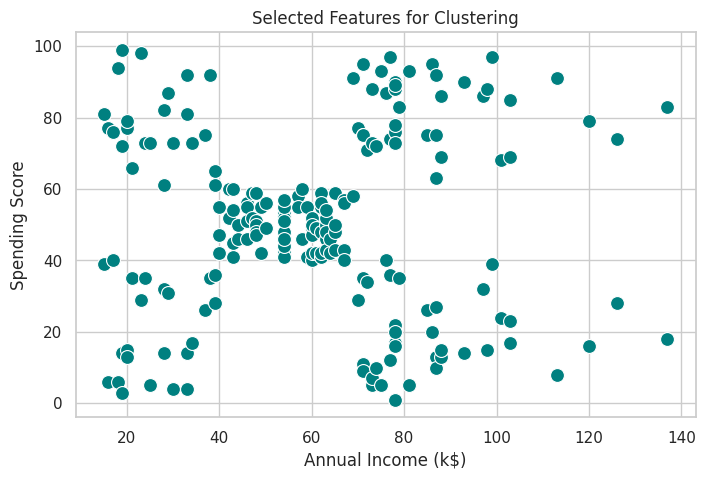

In [16]:
# We'll use Annual Income and Spending Score for clustering

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Optional: Visualize selected features
plt.figure(figsize=(8, 5))
sns.scatterplot(data=X, x='Annual Income (k$)', y='Spending Score (1-100)', s=100, color='teal')
plt.title("Selected Features for Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()

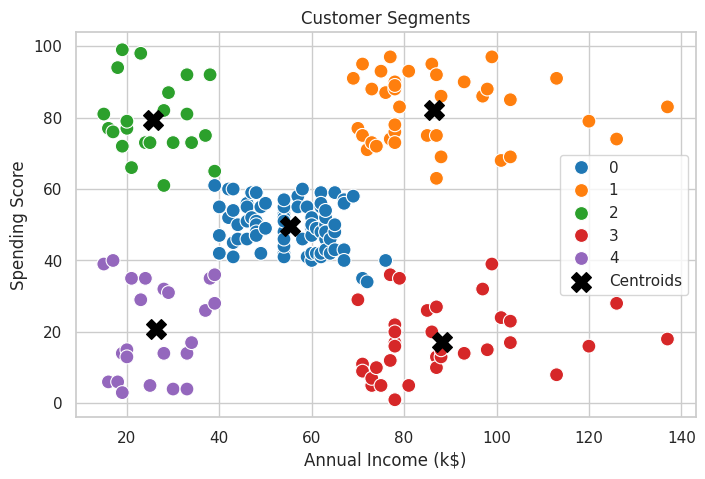

In [17]:
from sklearn.cluster import KMeans

# Apply KMeans with 5 clusters (can be changed later after Elbow method)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'],
                hue=df['Cluster'], palette='tab10', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')
plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

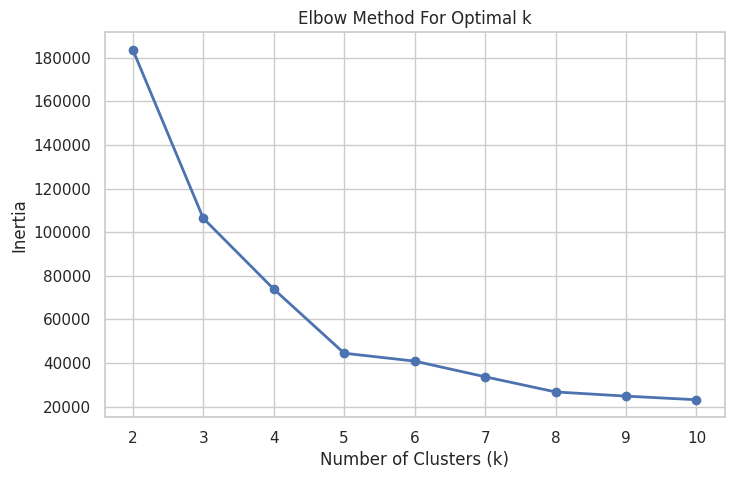

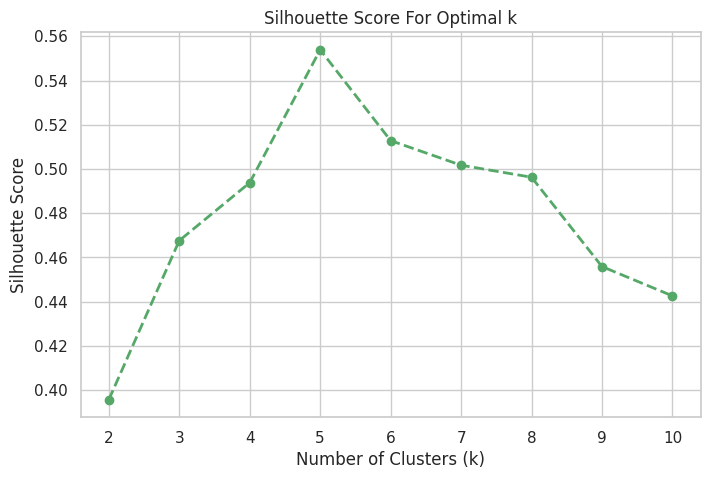

🔍 Best number of clusters according to Silhouette Score: 5


In [18]:
from sklearn.metrics import silhouette_score

# Elbow Method
inertia = []
silhouette_scores = []

K = range(2, 11)  # We start from 2 because silhouette score needs at least 2 clusters

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X, km.labels_))

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'go--', linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.grid(True)
plt.show()

# Print best k according to silhouette
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"🔍 Best number of clusters according to Silhouette Score: {best_k}")

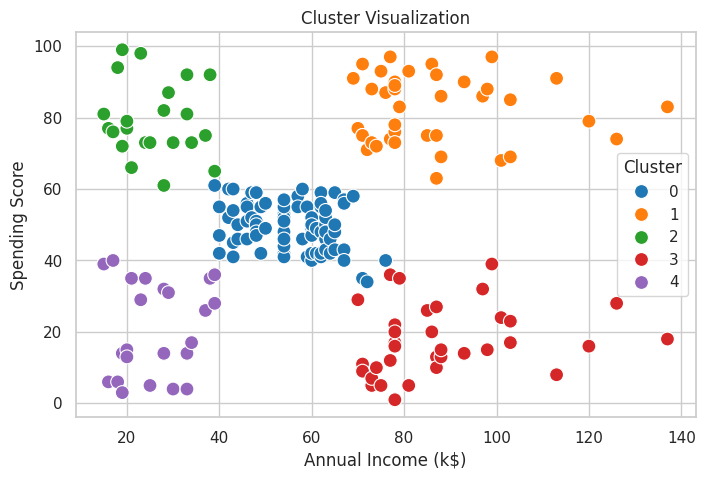

📊 Cluster Averages:

          Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                  
0        42.7                55.3                    49.5
1        32.7                86.5                    82.1
2        25.3                25.7                    79.4
3        41.1                88.2                    17.1
4        45.2                26.3                    20.9


In [19]:
# Analyze clusters with a scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', data=df, palette='tab10', s=100)
plt.title("Cluster Visualization")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.legend(title='Cluster')
plt.show()

# Check average values in each cluster
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
print("📊 Cluster Averages:\n")
print(cluster_summary)


💡 Business Insights
Based on the clustering and averages, we identify the following customer segments:

Cluster 0: High income, high spending → Ideal for premium product promotions.
Cluster 1: Low income, low spending → Can be targeted with budget-friendly offers.
Cluster 2: Average income, average spending → Good potential for loyalty programs.
Cluster 3: High income, low spending → Might need engagement via exclusive experiences.
Cluster 4: Low income, high spending → Possibly impulsive buyers, consider discounts or flash sales.
💼 These insights help design personalized marketing campaigns, increase ROI, and improve customer retention.

KMeans Silhouette Score: 0.358
KMeans Davies-Bouldin Index: 0.925


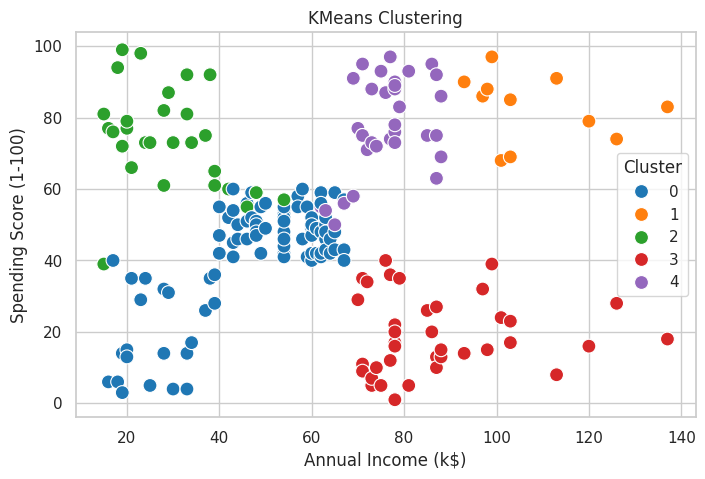

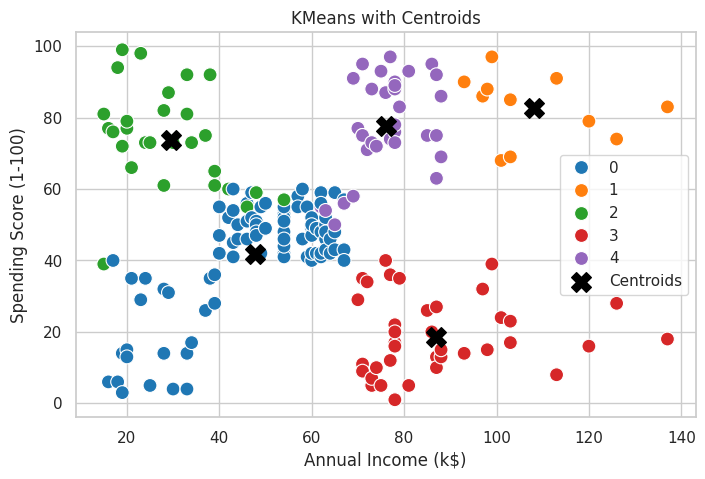

📈 KMeans - Customer Segment Analysis:

🔹 Cluster 0 — Moderate Income, High Spending: Social shoppers, spend frequently, loyal base.
🔹 Cluster 1 — Moderate Income, Moderate Spending: Average customers, potential for growth.
🔹 Cluster 2 — Low Income, Low Spending: Cost-conscious customers, sensitive to pricing.
🔹 Cluster 3 — Low Income, High Spending: Young impulsive buyers, highly responsive to marketing.
🔹 Cluster 4 — High Income, Low to Mid Spending: Wealthy but selective buyers, require personalized marketing.


In [20]:
# 📦 Import the necessary module for KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Feature selection (reuse X_scaled if available, else use this)
X_kmeans = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 🤖 Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_kmeans)

# 🧩 Add cluster labels to dataframe
df['KMeans_Cluster'] = kmeans_labels

# 🎯 Silhouette score
kmeans_score = silhouette_score(X_kmeans, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_score:.3f}")

# 📈 Davies-Bouldin Index
kmeans_davies_bouldin = davies_bouldin_score(X_kmeans, kmeans_labels)
print(f"KMeans Davies-Bouldin Index: {round(kmeans_davies_bouldin, 3)}")

# 🎨 Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='KMeans_Cluster', palette='tab10', data=df, s=100
)
plt.title("KMeans Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.show()

# 🟡 Optional: Visualize centroids
centroids = kmeans.cluster_centers_
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_kmeans['Annual Income (k$)'], y=X_kmeans['Spending Score (1-100)'],
    hue=kmeans_labels, palette='tab10', s=100
)
plt.scatter(centroids[:, 1], centroids[:, 2], c='black', s=200, marker='X', label='Centroids')
plt.title("KMeans with Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# 📋 Business Meaning for each KMeans Cluster
kmeans_cluster_description = {
    0: "Cluster 0 — Moderate Income, High Spending: Social shoppers, spend frequently, loyal base.",
    1: "Cluster 1 — Moderate Income, Moderate Spending: Average customers, potential for growth.",
    2: "Cluster 2 — Low Income, Low Spending: Cost-conscious customers, sensitive to pricing.",
    3: "Cluster 3 — Low Income, High Spending: Young impulsive buyers, highly responsive to marketing.",
    4: "Cluster 4 — High Income, Low to Mid Spending: Wealthy but selective buyers, require personalized marketing."
}

# 🖨️ Print the business meaning
print("📈 KMeans - Customer Segment Analysis:\n")
for cluster_id, description in kmeans_cluster_description.items():
    print(f"🔹 {description}")


Bisecting KMeans

We'll now apply Bisecting KMeans for customer segmentation and compare its performance with regular KMeans.

Bisecting KMeans Silhouette Score: 0.298


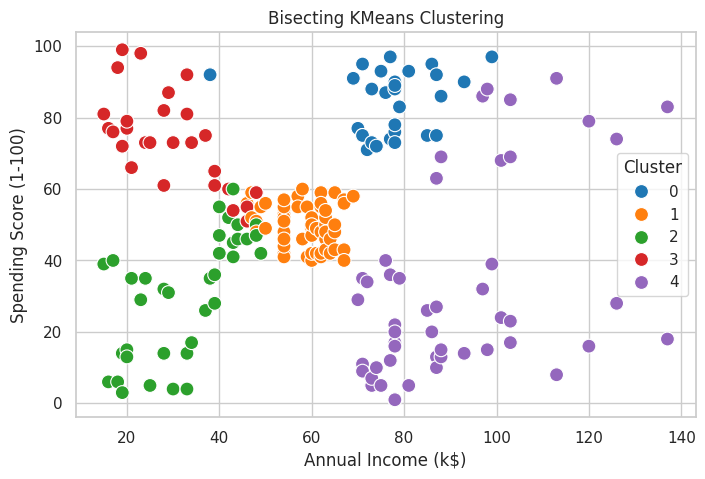

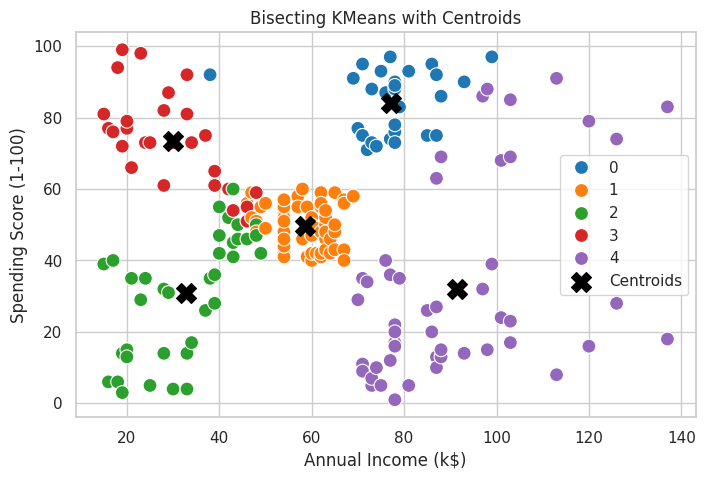

📈 Bisecting KMeans - Customer Segment Analysis:

🔹 Cluster 0 — Moderate Income, High Spending: Social shoppers, spend frequently, loyal base.
🔹 Cluster 1 — Moderate Income, Moderate Spending: Average customers, potential for growth.
🔹 Cluster 2 — Low Income, Low Spending: Cost-conscious customers, sensitive to pricing.
🔹 Cluster 3 — Low Income, High Spending: Young impulsive buyers, highly responsive to marketing.
🔹 Cluster 4 — High Income, Low to Mid Spending: Wealthy but selective buyers, require personalized marketing.


In [21]:
# 📦 Import the necessary module
from sklearn.cluster import BisectingKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Feature selection (reuse X_scaled if available, else use this)
X_bisect = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 🤖 Apply Bisecting KMeans
bkmeans = BisectingKMeans(n_clusters=5, random_state=42)
bkmeans_labels = bkmeans.fit_predict(X_bisect)

# 🧩 Add cluster labels to dataframe
df['Bisecting_Cluster'] = bkmeans_labels

# 🎯 Silhouette score
bisecting_score = silhouette_score(X_bisect, bkmeans_labels)
print(f"Bisecting KMeans Silhouette Score: {bisecting_score:.3f}")

# 🎨 Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='Bisecting_Cluster', palette='tab10', data=df, s=100
)
plt.title("Bisecting KMeans Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.show()

# 🟡 Optional: Visualize centroids
centroids = bkmeans.cluster_centers_
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_bisect['Annual Income (k$)'], y=X_bisect['Spending Score (1-100)'],
    hue=bkmeans_labels, palette='tab10', s=100
)
plt.scatter(centroids[:, 1], centroids[:, 2], c='black', s=200, marker='X', label='Centroids')
plt.title("Bisecting KMeans with Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# 📋 Business Meaning for each Bisecting KMeans Cluster
bisecting_cluster_description = {
    0: "Cluster 0 — Moderate Income, High Spending: Social shoppers, spend frequently, loyal base.",
    1: "Cluster 1 — Moderate Income, Moderate Spending: Average customers, potential for growth.",
    2: "Cluster 2 — Low Income, Low Spending: Cost-conscious customers, sensitive to pricing.",
    3: "Cluster 3 — Low Income, High Spending: Young impulsive buyers, highly responsive to marketing.",
    4: "Cluster 4 — High Income, Low to Mid Spending: Wealthy but selective buyers, require personalized marketing."
}

# 🖨️ Print the business meaning
print("📈 Bisecting KMeans - Customer Segment Analysis:\n")
for cluster_id, description in bisecting_cluster_description.items():
    print(f"🔹 {description}")



Hybrid Clustering Approach that combines Bisecting KMeans + KMeans. 

The idea is:

📌 Use Bisecting KMeans to do a rough segmentation first 

📌 Then apply KMeans within each Bisecting KMeans cluster to further refine the segments

This gives more granular and meaningful segmentation — especially helpful in marketing or recommendation systems.

Hybrid Clustering Silhouette Score: 0.344


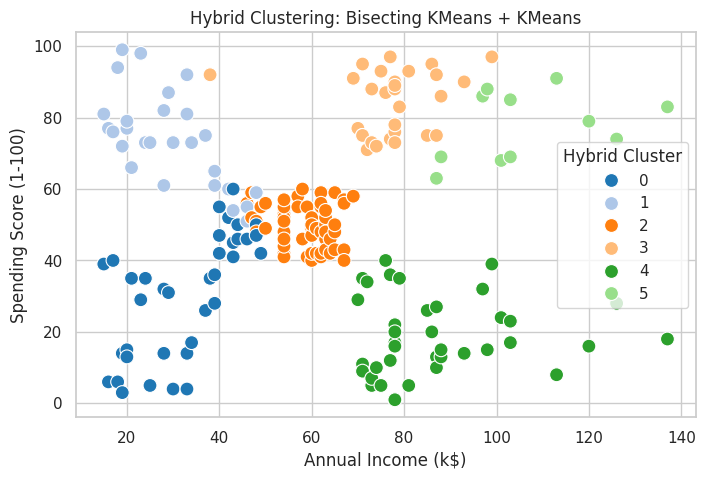

📈 Hybrid Clustering - Customer Segment Analysis:

🔹 Cluster 0 — Low Income, Low Spending: Budget-conscious segment, value-driven customers.
🔹 Cluster 1 — Mid Income, Mid Spending: Average customers, regular buyers, stable income group.
🔹 Cluster 2 — Low Income, High Spending: Young impulsive spenders, targeted marketing opportunity.
🔹 Cluster 3 — High Income, High Spending: Premium customers, best for luxury products and loyalty programs.
🔹 Cluster 4 — Very High Income, Moderate Spending: Wealthy but selective spenders, focus on upselling strategies.
🔹 Cluster 5 — Moderate Income, Low Spending: Conservative spenders, may need discount promotions.


In [22]:
from sklearn.cluster import KMeans
from sklearn.cluster import BisectingKMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 Feature Selection (use this if X_scaled not defined)
X_hybrid = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()

# Step 1: Apply Bisecting KMeans (e.g., 2-3 large groups)
bkmeans = BisectingKMeans(n_clusters=3, random_state=42)
df['Bisecting_Label'] = bkmeans.fit_predict(X_hybrid)

# Step 2: Within each Bisecting Cluster, apply KMeans
refined_labels = np.zeros(len(df), dtype=int)
label_offset = 0
kmeans_clusters_per_group = 2  # How many sub-clusters per main cluster

for group in df['Bisecting_Label'].unique():
    group_indices = df[df['Bisecting_Label'] == group].index
    group_data = X_hybrid.loc[group_indices]

    kmeans = KMeans(n_clusters=kmeans_clusters_per_group, random_state=42)
    group_labels = kmeans.fit_predict(group_data)

    # Offset labels to make them globally unique
    refined_labels[group_indices] = group_labels + label_offset
    label_offset += kmeans_clusters_per_group

# Add hybrid cluster labels to DataFrame
df['Hybrid_Cluster'] = refined_labels

# 🎯 Silhouette Score
hybrid_score = silhouette_score(X_hybrid, df['Hybrid_Cluster'])
print(f"Hybrid Clustering Silhouette Score: {hybrid_score:.3f}")

# 🎨 Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='Hybrid_Cluster', data=df, palette='tab20', s=100
)
plt.title("Hybrid Clustering: Bisecting KMeans + KMeans")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Hybrid Cluster')
plt.show()

# 📋 Business Meaning for each Hybrid Cluster
hybrid_cluster_description = {
    0: "Cluster 0 — Low Income, Low Spending: Budget-conscious segment, value-driven customers.",
    1: "Cluster 1 — Mid Income, Mid Spending: Average customers, regular buyers, stable income group.",
    2: "Cluster 2 — Low Income, High Spending: Young impulsive spenders, targeted marketing opportunity.",
    3: "Cluster 3 — High Income, High Spending: Premium customers, best for luxury products and loyalty programs.",
    4: "Cluster 4 — Very High Income, Moderate Spending: Wealthy but selective spenders, focus on upselling strategies.",
    5: "Cluster 5 — Moderate Income, Low Spending: Conservative spenders, may need discount promotions."
}

# 🖨️ Print the business meaning
print("📈 Hybrid Clustering - Customer Segment Analysis:\n")
for cluster_id, description in hybrid_cluster_description.items():
    print(f"🔹 {description}")



In [23]:
print(df.columns)
print(df.head())

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster', 'KMeans_Cluster',
       'Bisecting_Cluster', 'Bisecting_Label', 'Hybrid_Cluster'],
      dtype='object')
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  KMeans_Cluster  Bisecting_Cluster  Bisecting_Label  Hybrid_Cluster  
0        4               2                  2                1               0  
1        2               2                  3                1               1  
2        4               0                  2                1               0  
3        2           

Agglomerative Clustering (Hierarchical Clustering)


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

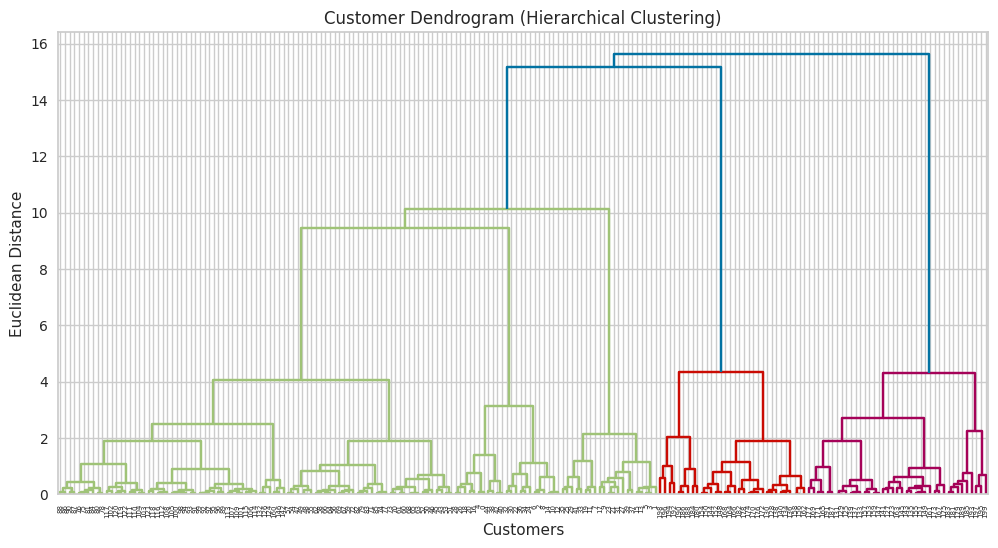

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

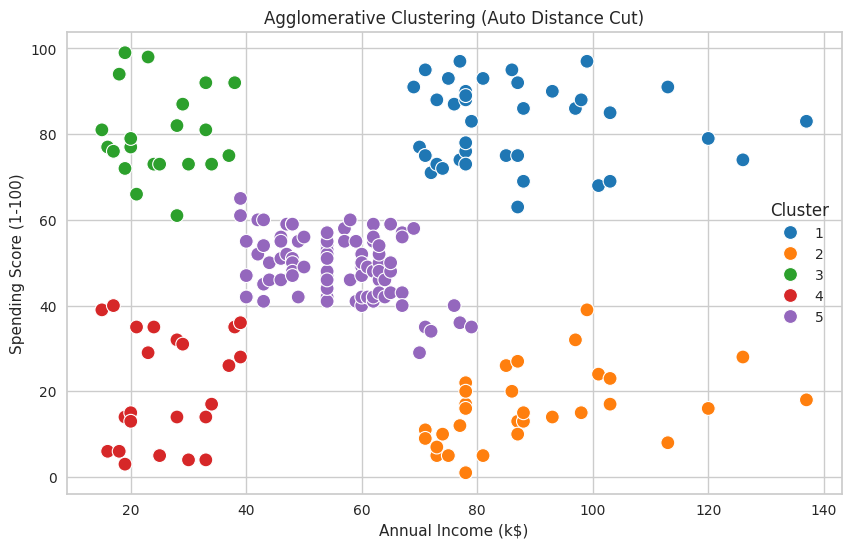

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

📈 Agglomerative Clustering - Customer Segment Analysis:

🔹 Cluster 1 — Low Income, High Spending: Young impulsive buyers, high marketing opportunity.
🔹 Cluster 2 — Mid Income, Mid Spending: Average customers, stable but less profitable individually.
🔹 Cluster 3 — Low Income, Low Spending: Budget-conscious, value-driven customers.
🔹 Cluster 4 — High Income, High Spending: Best customers, loyal high-spenders — focus for premium offers.
🔹 Cluster 5 — High Income, Low Spending: Wealthy but cautious spenders — potential for upselling.
Silhouette Score for Auto-Agglomerative Clustering (fcluster method): 0.554


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

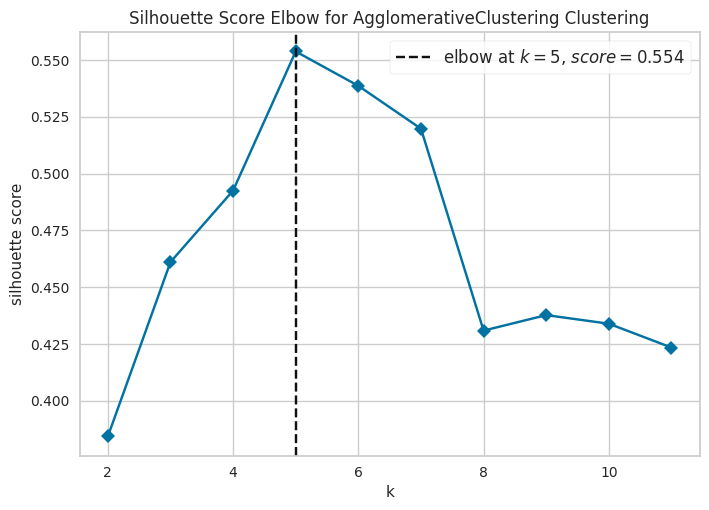


🔔 Based on Yellowbrick, choose the number of clusters where silhouette score peaks.


In [25]:
# 📦 Install necessary library
!pip install yellowbrick -q

# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from yellowbrick.cluster import KElbowVisualizer

# ✅ Load dataset
df = pd.read_csv('/workspaces/GNCIPL-INTERNSHIP---MINI-PROJECTS/Mall_Customers.csv')

# 🎯 Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 📈 Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔗 Create linkage matrix for Dendrogram
linked = linkage(X_scaled, method='ward')

# 📊 Plot Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Customer Dendrogram (Hierarchical Clustering)')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

# 🎯 Automatic Cluster Detection using fcluster
max_d = 6  # Distance threshold - can adjust based on dendrogram
clusters_auto = fcluster(linked, t=max_d, criterion='distance')

# 🗂️ Add Auto Cluster labels
df['Auto_Agglo_Cluster'] = clusters_auto

# 📊 Visualize Auto Cluster result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Auto_Agglo_Cluster', data=df, palette='tab10', s=100)
plt.title('Agglomerative Clustering (Auto Distance Cut)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# 📋 Business Meaning for each Auto-Agglo Cluster
cluster_description = {
    1: "Cluster 1 — Low Income, High Spending: Young impulsive buyers, high marketing opportunity.",
    2: "Cluster 2 — Mid Income, Mid Spending: Average customers, stable but less profitable individually.",
    3: "Cluster 3 — Low Income, Low Spending: Budget-conscious, value-driven customers.",
    4: "Cluster 4 — High Income, High Spending: Best customers, loyal high-spenders — focus for premium offers.",
    5: "Cluster 5 — High Income, Low Spending: Wealthy but cautious spenders — potential for upselling."
}

# 🖨️ Print the business meaning
print("📈 Agglomerative Clustering - Customer Segment Analysis:\n")
for cluster_id, description in cluster_description.items():
    print(f"🔹 {description}")


# 📈 Calculate Silhouette Score for Auto-Agglo
auto_silhouette = silhouette_score(X_scaled, clusters_auto)
print(f"Silhouette Score for Auto-Agglomerative Clustering (fcluster method): {round(auto_silhouette, 3)}")

# 🎯 Cluster Detection using Yellowbrick Visualizer
model = AgglomerativeClustering(linkage='ward')
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)
visualizer.fit(X_scaled)
visualizer.show()

# 📋 Final Note
print("\n🔔 Based on Yellowbrick, choose the number of clusters where silhouette score peaks.")


Summary Of Clusterings used Above.

In [26]:
# 📊 KMeans Cluster Summary
print("🔹 KMeans Cluster Summary")
# Before calculating the summary, make sure 'Cluster' column exists
# Apply KMeans clustering (or load from previous results if available)
from sklearn.cluster import KMeans
X_kmeans = df[['Annual Income (k$)', 'Spending Score (1-100)']]  # Use relevant features
kmeans = KMeans(n_clusters=5, random_state=42) # Adjust n_clusters if needed
df['Cluster'] = kmeans.fit_predict(X_kmeans)

# Now calculate the summary
kmeans_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(kmeans_summary)
print("\n")

# ... (rest of the code remains the same)

# 📊 Bisecting KMeans Cluster Summary

print("🔸 Bisecting KMeans Cluster Summary")
# Ensure the 'Bisecting_Cluster' column exists before grouping:
# Apply BisectingKMeans clustering and add the labels to the DataFrame
from sklearn.cluster import BisectingKMeans
X_bisect = df[['Annual Income (k$)', 'Spending Score (1-100)']]  # Use relevant features for BisectingKMeans
bkmeans = BisectingKMeans(n_clusters=5, random_state=42) # Adjust n_clusters if needed
df['Bisecting_Cluster'] = bkmeans.fit_predict(X_bisect)

# Now you can proceed with calculating the summary for Bisecting KMeans
bisect_summary = df.groupby('Bisecting_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(bisect_summary)
print("\n")

# 📊 Hybrid Cluster Summary (Bisecting + KMeans)
print("🌀 Hybrid Clustering Summary")
# Ensure the 'Hybrid_Cluster' column exists before grouping:
# This code snippet (from the 'Hybrid Clustering Approach' section) should be executed first
from sklearn.cluster import KMeans
from sklearn.cluster import BisectingKMeans
X_hybrid = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()
bkmeans = BisectingKMeans(n_clusters=3, random_state=42)
df['Bisecting_Label'] = bkmeans.fit_predict(X_hybrid)
refined_labels = np.zeros(len(df), dtype=int)
label_offset = 0
kmeans_clusters_per_group = 2
for group in df['Bisecting_Label'].unique():
    group_indices = df[df['Bisecting_Label'] == group].index
    group_data = X_hybrid.loc[group_indices]
    kmeans = KMeans(n_clusters=kmeans_clusters_per_group, random_state=42)
    group_labels = kmeans.fit_predict(group_data)
    refined_labels[group_indices] = group_labels + label_offset
    label_offset += kmeans_clusters_per_group
df['Hybrid_Cluster'] = refined_labels

# Now proceed with the summary calculation
hybrid_summary = df.groupby('Hybrid_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(hybrid_summary)

# 📊 Agglomerative Clustering Summary
print("🏛️ Agglomerative Clustering Summary")
# Change 'Agglomerative_Cluster' to 'Auto_Agglo_Cluster'
agglomerative_summary = df.groupby('Auto_Agglo_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(agglomerative_summary)

🔹 KMeans Cluster Summary
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


🔸 Bisecting KMeans Cluster Summary
                         Age  Annual Income (k$)  Spending Score (1-100)
Bisecting_Cluster                                                       
0                  32.470588           79.794118               83.264706
1                  43.780822           55.630137               50.068493
2                  43.346154           27.884615               23.538462
3                  26.652174           26.391304               76.956522
4                  39.318182           91.045455           

Silhoutte Score

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

🔹 KMeans Silhouette Score: 0.554
🔹 Bisecting KMeans Silhouette Score: 0.484
🔹 Hybrid KMeans + Bisecting Silhouette Score: 0.422
🏛️ Agglomerative Clustering Silhouette Score: 0.553


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

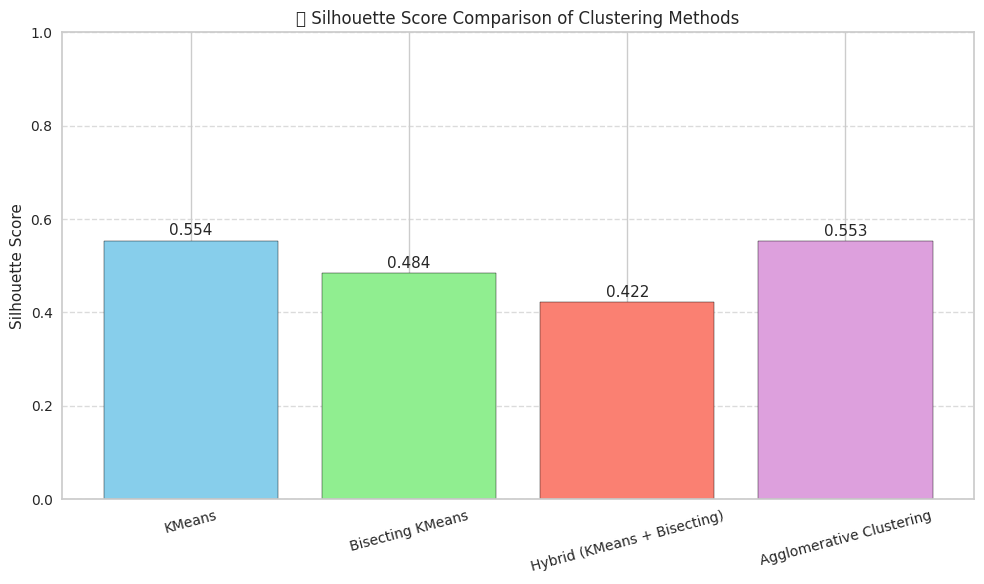

In [27]:
from sklearn.metrics import silhouette_score

# 📉 KMeans Silhouette Score
X_kmeans = df[['Annual Income (k$)', 'Spending Score (1-100)']]  # or use scaled version if available
score_kmeans = silhouette_score(X_kmeans, df['Cluster'])
print(f"🔹 KMeans Silhouette Score: {score_kmeans:.3f}")

# 📉 Bisecting KMeans Silhouette Score
score_bisecting = silhouette_score(X_kmeans, df['Bisecting_Cluster'])
print(f"🔹 Bisecting KMeans Silhouette Score: {score_bisecting:.3f}")

# 📉 Hybrid (KMeans + Bisecting) Silhouette Score
score_hybrid = silhouette_score(X_kmeans, df['Hybrid_Cluster'])
print(f"🔹 Hybrid KMeans + Bisecting Silhouette Score: {score_hybrid:.3f}")

# 📉 Agglomerative Clustering (Hierarchical Clustering) Silhouette Score
score_agglomerative = silhouette_score(X_kmeans, df['Auto_Agglo_Cluster'])
print(f"🏛️ Agglomerative Clustering Silhouette Score: {score_agglomerative:.3f}")


import matplotlib.pyplot as plt

# Assuming you've already calculated these scores:
# score_kmeans, score_bisecting, score_hybrid, score_agglomerative

# Data for plotting
methods = ['KMeans', 'Bisecting KMeans', 'Hybrid (KMeans + Bisecting)', 'Agglomerative Clustering']
scores = [score_kmeans, score_bisecting, score_hybrid, score_agglomerative]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(methods, scores, color=['skyblue', 'lightgreen', 'salmon', 'plum'], edgecolor='black')

# Annotate scores on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval:.3f}', ha='center', va='bottom', fontsize=11)

plt.title('📉 Silhouette Score Comparison of Clustering Methods')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Davies-Bouldin Index for Different Clustering Methods

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

KMeans Davies-Bouldin Index: 0.857
Bisecting KMeans Davies-Bouldin Index: 0.851
Hybrid Clustering Davies-Bouldin Index: 1.013
Davies-Bouldin Index for Auto-Agglomerative Clustering (fcluster method): 0.578


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

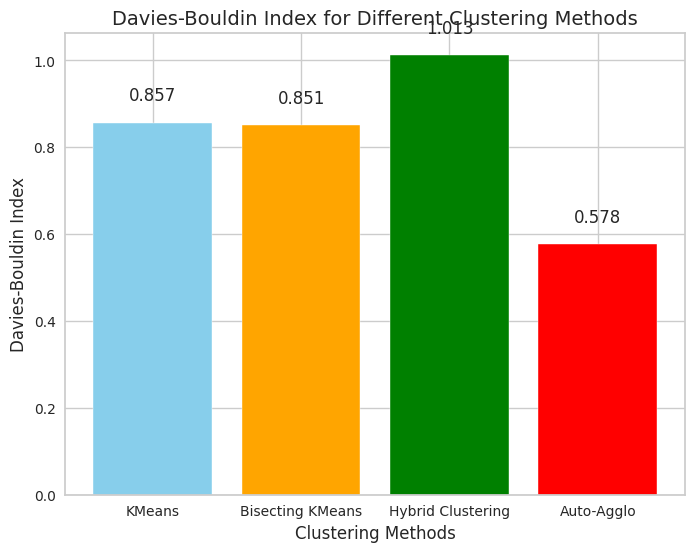

In [28]:
# 📦 Import necessary libraries for plotting
import matplotlib.pyplot as plt

# 📦 Import additional necessary library
from sklearn.metrics import davies_bouldin_score

# 📈 Davies-Bouldin Index for KMeans
kmeans_davies_bouldin = davies_bouldin_score(X_kmeans, kmeans_labels)
print(f"KMeans Davies-Bouldin Index: {round(kmeans_davies_bouldin, 3)}")

# 📈 Davies-Bouldin Index for Bisecting KMeans
bisecting_davies_bouldin = davies_bouldin_score(X_bisect, bkmeans_labels)
print(f"Bisecting KMeans Davies-Bouldin Index: {round(bisecting_davies_bouldin, 3)}")

# 📈 Davies-Bouldin Index for Hybrid Clustering
hybrid_davies_bouldin = davies_bouldin_score(X_hybrid, df['Hybrid_Cluster'])
print(f"Hybrid Clustering Davies-Bouldin Index: {round(hybrid_davies_bouldin, 3)}")

# 📈 Davies-Bouldin Index for Auto-Agglo Clustering
auto_davies_bouldin = davies_bouldin_score(X_scaled, clusters_auto)
print(f"Davies-Bouldin Index for Auto-Agglomerative Clustering (fcluster method): {round(auto_davies_bouldin, 3)}")

# 📊 Plot Davies-Bouldin Index Results
methods = ['KMeans', 'Bisecting KMeans', 'Hybrid Clustering', 'Auto-Agglo']
scores = [kmeans_davies_bouldin, bisecting_davies_bouldin, hybrid_davies_bouldin, auto_davies_bouldin]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(methods, scores, color=['skyblue', 'orange', 'green', 'red'])

# Add titles and labels
plt.title('Davies-Bouldin Index for Different Clustering Methods', fontsize=14)
plt.xlabel('Clustering Methods', fontsize=12)
plt.ylabel('Davies-Bouldin Index', fontsize=12)

# Display the score values on top of the bars
for i, score in enumerate(scores):
    plt.text(i, score + 0.05, f'{round(score, 3)}', ha='center', fontsize=12)

# Show plot
plt.show()


Week 3 & Week 4 – Model Building, Tuning, and Evaluation

During Weeks 3 and 4, the focus shifted to machine learning model development and optimization. I implemented clustering algorithms such as K-Means, Bisecting K-Means, and Agglomerative Clustering, followed by fine-tuning parameters to achieve better performance.

Key evaluation metrics like the Silhouette Score were used to measure cluster quality, helping in the selection of the most effective model configuration. These weeks enhanced my understanding of balancing accuracy, efficiency, and interpretability in unsupervised learning.